<a href="https://colab.research.google.com/github/ShubhamTibrewal01/GAN_Assignment1/blob/main/ans4exp_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import keras.backend as K 

from tensorflow.keras.datasets import cifar10

# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)



x = Flatten()(x)

x = Dense(128)(x)
x = LeakyReLU()(x)
x = BatchNormalization()(x)

x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [9]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128 

# train

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=5
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 148s 94ms/step - loss: 1.7080 - accuracy: 0.4255 - val_loss: 1.2437 - val_accuracy: 0.5585
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.1973 - accuracy: 0.5794 - val_loss: 1.0789 - val_accuracy: 0.6204
Epoch 3/5
1563/1563 [==============================] - 145s 93ms/step - loss: 1.0226 - accuracy: 0.6420 - val_loss: 0.9724 - val_accuracy: 0.6544
Epoch 4/5
1563/1563 [==============================] - 146s 94ms/step - loss: 0.9324 - accuracy: 0.6748 - val_loss: 0.9219 - val_accuracy: 0.6719
Epoch 5/5
1563/1563 [==============================] - 148s 95ms/step - loss: 0.8626 - accuracy: 0.7007 - val_loss: 0.8599 - val_accuracy: 0.6984


In [12]:
model.layers[6].get_weights()

[array([0.9477869 , 1.0131118 , 1.2410282 , 1.0976111 , 1.111032  ,
        1.0091748 , 0.97075677, 0.9562433 , 0.9557384 , 0.9348544 ,
        0.9103378 , 1.1373193 , 0.87594986, 0.937982  , 1.054077  ,
        0.9171991 , 0.9965752 , 1.0957763 , 0.94596064, 0.90091836,
        0.88323116, 1.0932095 , 1.1843199 , 0.92009246, 0.8965853 ,
        0.8740731 , 1.0404615 , 1.0092611 , 1.0411781 , 1.0475228 ,
        0.87277484, 1.0293592 ], dtype=float32),
 array([ 0.14854722, -0.02885774,  0.0037488 ,  0.03922458,  0.00934355,
        -0.05125772, -0.01645004, -0.01392962,  0.13380103,  0.09288867,
         0.04906861,  0.19940436,  0.11109337,  0.12914622, -0.02926775,
         0.13702247, -0.06683569, -0.15240696,  0.12129863, -0.0172014 ,
         0.10505204,  0.10811365, -0.03928149,  0.24632522,  0.1861662 ,
         0.02101343,  0.01497184,  0.07160278,  0.03200701,  0.02043666,
        -0.01658076, -0.11501564], dtype=float32),
 array([0.43172958, 0.01692633, 0.21157405, 0.45742476

# analysis

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 7s 641ms/step - loss: 0.8599 - accuracy: 0.6984


[0.8599382042884827, 0.6984000205993652]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

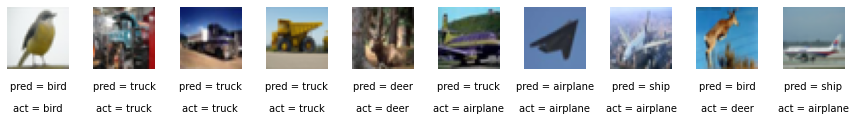

In [15]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
